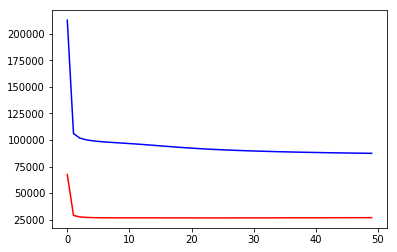

In [4]:
import numpy
import matplotlib.pyplot as plt


def matrix_factorization(R, P, Q, K, V, iterations=30, lr=0.02, beta=0.1):
    Q = Q.T
    N = R.shape[0]
    M = R.shape[1]
    Tloss = numpy.zeros(iterations)
    Vloss = numpy.zeros(iterations)
    for step in range(iterations):
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + lr * (2 * eij * Q[k][j] - beta * P[i][k]) #调整用户因子矩阵
                        Q[k][j] = Q[k][j] + lr * (2 * eij * P[i][k] - beta * Q[k][j]) #调整物品因子矩阵
        eR = numpy.dot(P,Q)
        #计算迭代后Loss
        e = 0
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        #计算validation集上的Loss
        v = 0
        for i in range(N):
            for j in range(M):
                if V[i][j] > 0:
                    v = v + pow(V[i][j] - numpy.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        v = v + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        Tloss[step] = e
        Vloss[step] = v
    return P, Q.T, Tloss, Vloss

#  lr:学习率
#  beta:正则项权重
#  iterations:迭代次数
lr = 0.005
beta = 0.1
iterations = 50

#从文件读取数据集，包括已划分好的训练集，验证集
def readData(filename):
    file = open(filename)
    array_of_lines = file.readlines()
    data = numpy.zeros((948,1682))
    for line in array_of_lines:
        line=line.strip()
        list=line.split('\t')
        user = eval(list[0])-1
        item = eval(list[1])-1
        rating = eval(list[2])
        data[user][item] = rating
    return data

if __name__ == "__main__":

    R = readData('u1.base')
    V = readData('u1.test')
    N = R.shape[0]
    M = R.shape[1]
    K = 5

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ, Tloss, Vloss = matrix_factorization(R, P, Q, K, V, iterations, lr, beta)

    nQ = nQ.T

#将P，Q转置相乘，得到预测矩阵
    rate = numpy.zeros((N,M))
    for i in range(N):
        for j in range(M):
            rate[i][j] = numpy.dot(nP[i,:],nQ[:,j])
           
    plt.plot(numpy.arange(iterations), Tloss, label='Trainging Loss', color='b')
    plt.plot(numpy.arange(iterations), Vloss, label='Validation', color='r')
    plt.show()